# Rebuild Example
In this notebook we reconstruct an image found in the github notebook corpus (see https://github.com/activityhistory/jupyter_on_github for additional details). This is the image that is found in the vis lint paper. We also reproduce the exact notebook in this repo for reference. We start by importing the necessary files and setting up the chart we will be using

In [1]:
import pandas as pd

# hacky path usage to get vislint imported correctly
import sys
sys.path.append('../../lint_rules')
sys.path.append('../../')
from vislint import vislint

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

markers = ['o', '^', 's', 'D', 'v', 'h', 'p']

In [2]:
car_data = pd.read_csv('data/vehicules-commercialises.csv.gz', sep=';')
last_year = sorted(car_data.Année)[-1]
car_data = car_data[car_data.Année == last_year]
car_data = car_data[car_data.Carburant == 'Essence']

In [3]:
colors = [
    (0.8941176470588236, 0.10196078431372549, 0.10980392156862745), 
    (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), 
    (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), 
    (0.596078431372549, 0.3058823529411765, 0.6392156862745098), 
    (1.0, 0.4980392156862745, 0.0), 
    (1.0, 1.0, 0.2), 
    (0.6509803921568628, 0.33725490196078434, 0.1568627450980392)
]

<module 'matplotlib.pyplot' from '/Users/mcnutt/vislint_mpl/lib/python3.6/site-packages/matplotlib/pyplot.py'>

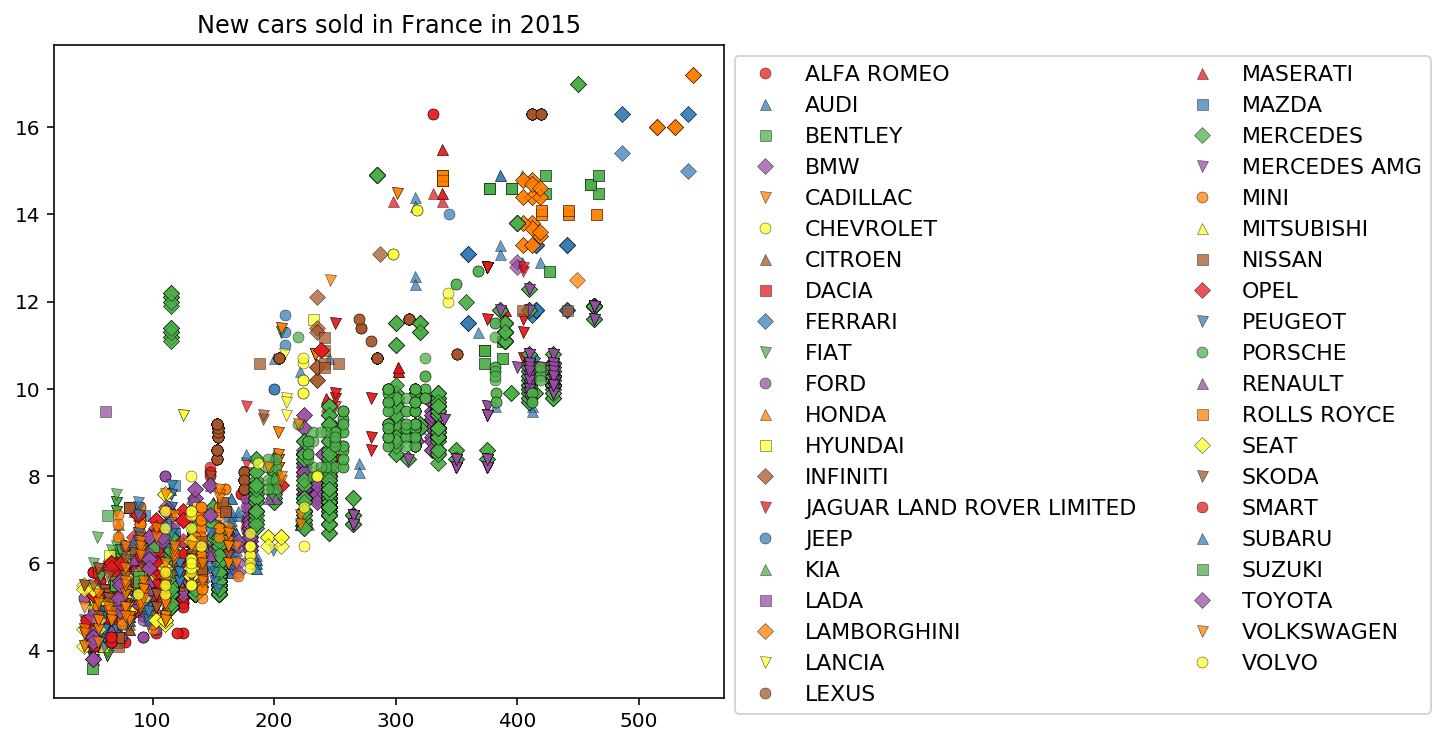

In [4]:
df = car_data
group_by = 'Marque'

df = df.drop_duplicates()
max_colors = 7
fig, ax = plt.subplots(figsize=(6, 6))
for i, (maker, group) in enumerate(df.groupby(group_by)):
    ax.plot(group['Puissance maximale'], group['Consommation mixte'],
            marker=markers[i % 5], color=colors[i % max_colors],
            linestyle='', ms=5.5, alpha=0.74, label=maker, markeredgecolor='k', markeredgewidth=0.25)
plt.legend(ncol=2, numpoints=1, bbox_to_anchor=(
    1., 1.), fontsize=11, frameon=True)
plt.axis('on')

plt.title('New cars sold in France in {0}'.format(last_year))
plt



Next we throw our chart through vislint to see what we need to fix. And low it distinguishes a very reasonable collection of failures.

In [5]:
vislint(ax, plt.figure(), {"representation-invariance": 0.01})

[0.34, 0.44, 0.53, 0.43, 0.59, 0.91, 0.41, 1.0]


[('require-axes', 'Axes must be labeled'),
 ('no-indistinguishable-series', 'Series must be distinguishable'),
 ('max-colors', 'Too many colors')]

<Figure size 432x288 with 0 Axes>